# Name- Nilesh Pandey, ML

## 1. (6 pts) We can use gradient descent with a least squares cost function in place of the normal equations method to fit highly non-linear functions in very high dimensions. Given a very small learning parameter, α, along with an arbitrary starting position, can we guarantee we can eventually converge to an optimal solution? Please explain in a few words why yes or no.

#### Ans: Yes, because our least squares cost function is convex [-3 for saying No ; -3 for not stating cost function is convex]

## 2. (6 pts) Please check which statements are true regarding least squares gradient descent solving for linear regression parameters θ0 and θ1:

a) If θ0 and θ1 are initialized to a local minimum, the first step will take them away from this local minimum
b) If our cost is increasing, we most likely need to increase α.
c) No matter how θ0 and θ1 are initialized, as long as α is sufficiently small, we will converge to the global minimum

### Ans: [-2 for each wrong answer] only ‘c)’ is correct. In ‘a)’ if we are at the minimum (there is only a global minimum in this problem), the derivative is 0, and the feature values will not change. In ‘b)’, if our cost is increasing, we have too large of a learning parameter and need to decrease it so that we take smaller steps towards the global minimum.

## 3. (6 pts) Suppose that for some linear regression problem (say, predicting life expectancy given cigarettes smoked per day as in the lecture), we have some training set, and for our training set we managed to find some θ0, θ1 such that J(θ0,θ1)=0. Which of the statements below must then be true? (Select all that apply.).

a) This is not possible: By the definition of J(θ0,θ1), it is not possible for there to exist θ0 and θ1 so that J(θ0,θ1)=0;
b) Our training set can be fit perfectly by a straight line, i.e., all of our training examples lie perfectly on some straight line
c) We can perfectly predict the value of y even for new examples that we have not yet seen. (e.g., we can perfectly predict prices of even new houses that we have not yet seen.)
d) Gradient descent is likely to get stuck at a local minimum and fail to find the global minimum

### Ans: [-1.5 for each wrong answer] b is the only true answer. ‘a)’ is possible if all points lie on a straight line; ‘c)’ even though we predict training set perfectly, this does not guarantee we can predict unforeseen test samples; ‘d)’ linear regression has a single global minimum [-1 for each incorrect]

## 4. (6 pts) Each of the below figures represent how the hypothesis (blue line) compares to the training set (red X). Label the plots as under fit, over fit, or good fit.

### Ans: a) underfit; b) good fit; c) good fit; d) over fit [-1.5 for each incorrect]

## 5. (6 pts) You are training a classification model with linear regression. Which of the following statements are true? Indicate true or false for each item.

a) Adding many new features to the model helps prevent overfitting on the training set
b) Introducing regularization to the model always results in equal or better performance on examples not in the training set
c) Adding many new features to the model makes it more likely to overfit the training set
d) Adding a new feature to the model always results in equal or better performance on examples not in the training set

### Ans: Only ‘c)’ is true [-1.5 for each incorrect]
#### ‘a)’ is false as too many features can cause overfitting. Number of samples >> number of features
#### ‘b)’ is false as we can under fit the data with too much regularization
#### ‘c’)’ is true- see explanation for ‘a)’
#### ‘d)’ is false. New features may overfit the training set. Also a new feature that is a linear combination of existing features will not change the result.

## 6. (6 pts) Which of the following statements about regularization are true? Indicate true or false for each item.
a) Using too large a value of λ can cause your hypothesis to overfit the data; this can be avoided by reducing λ.;
b) Using a very large value of λ cannot hurt the performance of your hypothesis; the only reason we do not set λ to be too large is to avoid numerical problems;
c) Using too large a value of λ can cause your hypothesis to underfit the data;
d) Elastic net regularization can always find a better than or equal to solution as compared to ridge or lasso regression;
### Ans: only ‘c)’ and ‘d)’ are true [-1.5 for each incorrect]

#### ‘a)’ is false as large λ will underfit the training set
#### ‘b)’ is false λ only has to do with under fit vs. over fit
#### ‘c’)’ is true, see explanation ‘a)’
#### ‘d)’ is true. Since elastic net regularization is a linear combination of ridge and lasso, we can be anywhere between the two, or exactly one or the other. So, as a worst case scenario, we are equal to ridge or lasso.

# 7. (12 pts) Use the following code in matlab:

#### clear ; close all;
#### data = load('ex1data1.txt'); % Dataset from Andrew Ng, Machine Learning MOOC
#### X = data(:, 1);
#### y = data(:, 2);
#### plot(X, y, 'rx', 'MarkerSize', 10,'LineWidth',3); % Plot the data
#### ylabel('Profit in 10,000s'); % Set the y axis label
#### xlabel('Population of City in 10,000s'); % Set the x axis label
#### grid on
#### Use the normal equations method to solve for a linear line that goes through the data. Show code and include plot here (size=50%) showing the solution as a green dotted line- make sure linewidth is set to 3. x-axis should go from 0 to 25 and y-axis should go from -5 to 25.
#### Ans (show code and 50% plot): [-2 for each of line, linewidth, line color, line style, x/y axis size. -4 for no code]
#### M = [ones(length(X),1) X];
#### w = ((M'*M)\M')*y; % model params
#### x_eval = (0:25)';
#### M_eval = [ones(length(x_eval),1) x_eval];
#### y_eval = M_eval*w;
#### hold on;
#### plot(x_eval,y_eval,'g--','linewidth',3)
#### print -dpng normalEquation.png

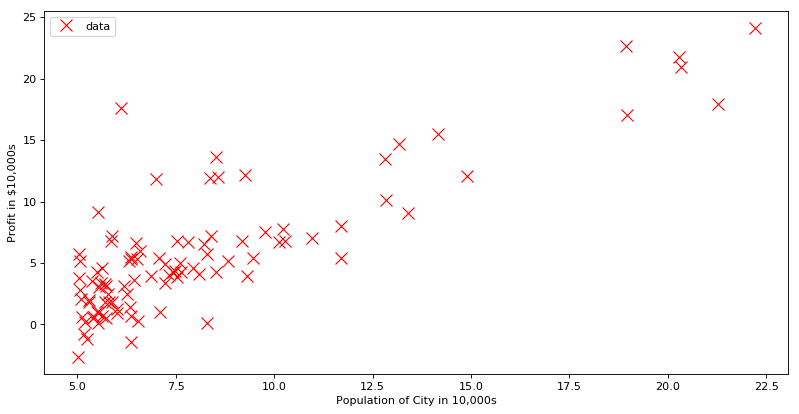

In [5]:
# load the required libraries
import numpy as np
import pandas as pd

# stats
from scipy import stats
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

# this is important so that image is not just saved as object but displayed too
%matplotlib inline

x = pd.read_csv('ex1data1.txt',sep=",",names = [1,2]) 
y = x[1] 
z = x[2] 


plt.figure(figsize=(12,6),dpi=80) # it always (row,columns) when asked for size in python
plt.plot(y,z,'xr',label="data",markersize=10,linewidth=3)
plt.xlabel("Population of City in 10,000s")
plt.ylabel('Profit in $10,000s')
plt.legend()


[0, 25, -5, 25]

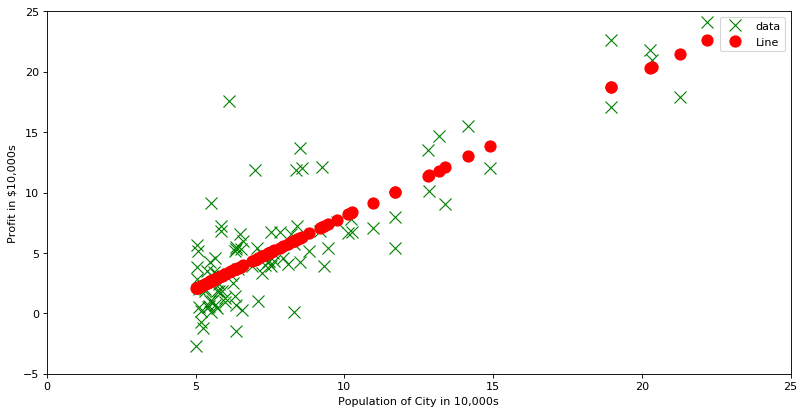

In [6]:
# continued from #7th sum

Y = pd.DataFrame(y,columns=[1])
Y = Y.assign(k = np.arange(0,97)) #assign is pandas method to assign new columns
# changing name, although there is no need
Y['k'] = 1 # this step is unecessary, since we could have assigned bias value 1 on declaration of new column like k =1
#instead of k = np.arange(0,97)
Y.columns = [1,2]
Y = Y[[2,1]]
Y.columns = [1,2]
# the above step could be made in 2 lines after declaration, it's for beginners
M = Y.as_matrix() #
#-----------important-------------
# It's very imporatnt to keep track of matrix, dataframe, and array. Matrix function don't work on df neither on array. 
# (n,) is array, whereas (n,1) is matrix
T = np.matrix.transpose(M)
# above step is unncecessary lenghty, it can be done as matrix.transpose() or np.transpose(M)
R = np.dot(T,M)
# dot is for matrix multipication
Q = pd.DataFrame(z) # z is variable from 7th problem, it's 2nd column from  data or feature
Q.columns = [1]
Q = Q.as_matrix()
# inverse and solving matrix will give different results from linalg.solve
# the above is valid for invertible matrix, for non invertible we use pseudo inverse, but not pinv() but linalg.inv()
X = np.linalg.solve(R,T) # we use linalg function instead of w = ((M'*M)\M')*y
W = np.dot(X,Q) # dot is for vectors, and matrix are vectors
p = np.dot(Y,W)

Y = Y.as_matrix()

p = np.dot(Y,W)


m = W[1] #feature
c = W[0]# intercept
plt.figure(figsize=(12,6),dpi=80)
plt.plot(y,z,'xg',label="data",markersize=10,linewidth=3)
plt.plot(y,p,'or',label="Line",markersize=10,linewidth=3)
# plt.plot(ku,pk,'ob',label="Line",markersize=10,linewidth=3)

plt.xlabel("Population of City in 10,000s")
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.axis([0, 25, -5, 25],'tight')


# 8th problem

In [7]:
import numpy as np
import pandas as pd

# stats
from scipy import stats
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math


%matplotlib inline

x = pd.read_csv('ex1data1.txt',sep=",",names = [1,2]) 
y = x[1]
z = x[2]

XData = pd.DataFrame(y,columns=[1])
XData = XData.assign(k = np.arange(0,97))
XData['k'] = 1
XData.columns = [1,2]

XData = XData[[2,1]]
XData.columns = [1,2]
XData = XData.as_matrix()
Q = pd.DataFrame(z)
Q.columns = [1]
Q = Q.as_matrix()
X = y
theta = np.zeros(shape=(2, 1))


In [8]:


def computeCost(X, y, theta):
    n = len(Q)

    c = np.dot(X,theta)
    c = c - y
    c = np.power(c,2)
    J = c.sum(axis=0)/(2*n)
    return J

k = computeCost(XData, Q, theta)
k

array([ 32.07273388])

# 32.07273388 is cost in 8th problem

# 9th problem

Bias of the line [[-3.63029144]] and the slope of the line [[ 1.16636235]]


[0, 25, -5, 25]

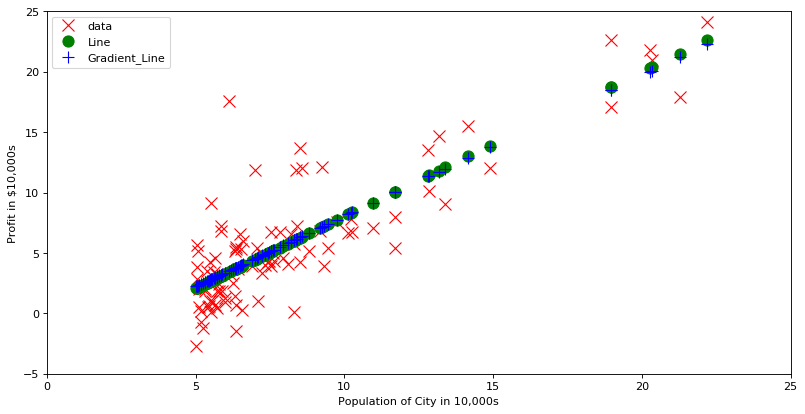

In [20]:
m1 = kkk[1][0]
c1 = kkk[0][0]
p1 = m1*y + c1
plt.figure(figsize=(12,6),dpi=80)
plt.plot(y,z,'xr',label="data",markersize=10,linewidth=3)
plt.plot(y,p,'og',label="Line",markersize=10,linewidth=3)
plt.plot(y,p1,'+b',label="Gradient_Line",markersize=10,linewidth=3)
plt.xlabel("Population of City in 10,000s")
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.axis([0, 25, -5, 25],'tight')

## 10th

In [54]:
#using result from problem # 9 
theta_g = np.array([[-3.63029144],
       [ 1.16636235]])

#This result is from problem #7
theta_L = np.array([[-3.89578088],
       [ 1.19303364]])
predict35kg_GD = np.dot(np.array([1,3.5]), theta_g)*10000
predict70kg_GD = np.dot(np.array([1,7]), theta_g)*10000
predict35kg_LR = np.dot(np.array([1,3.5]), theta_L)*10000
predict70kg_LR = np.dot(np.array([1,7]), theta_L)*10000

print("For population = 35,000 in Linear Regression, we predict a profit of {}".format(predict35kg_LR))
print("For population = 35,000 in Gradient Descent, we predict a profit of {}".format(predict35kg_GD))
print("For population = 70,000 in Linear Regression, we predict a profit of {}".format(predict70kg_LR))
print("For population = 70,000 in gradient Descent, we predict a profit of {}".format(predict70kg_GD))

For population = 35,000 in Linear Regression, we predict a profit of [ 2798.3686]
For population = 35,000 in Gradient Descent, we predict a profit of [ 4519.76785]
For population = 70,000 in Linear Regression, we predict a profit of [ 44554.546]
For population = 70,000 in gradient Descent, we predict a profit of [ 45342.4501]


# 11th problem case study

11. 
(6 pts) 
We have argued that the cost function is convex.  Use the below code to visualize the cost 
surface as a mesh and a contour

. No need to show any work for this problem...just understand the code.

% Grid over which we will calculate J

theta0_vals = linspace(-10, 10, 100);

theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's

J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals

for

i = 1:length(theta0_vals)
 
 for
 
 j = 1:length(theta1_vals)
    
    t = [theta0_vals(i); theta1_vals(j)];    
    
    J_vals(i,j) = computeCost(M, Q, t);
   
   end

end

In [96]:
def computeCost(X, y, theta):
    n = len(Q)
    theta = theta.reshape((2,1))
    c = np.dot(X,theta)
    c = c - y
    c = np.power(c,2)
    J = c.sum(axis=0)/(2*n)
    return J

theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
t = []
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
J_vals
i = j = 0
for i in range(1,len(theta0_vals)):
    for j in range(1,len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[[i],[j]] = computeCost(XData, Q, t);
        
j = J_vals.T

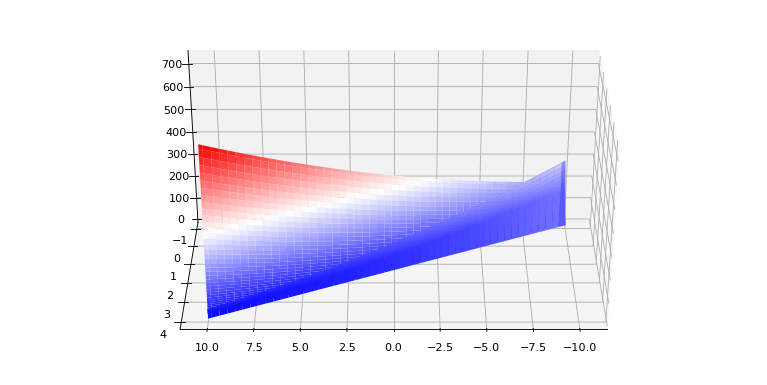

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6),dpi=80)
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, j,cmap = plt.cm.get_cmap('bwr'))
ax.view_init(azim=-270)

# X2 = X2.loc[0:47,[3,1,2]] <-- this is right too
# X2.loc[np.arange(0,47),[3,1,2]]

# 12th problem

In [125]:
import numpy as np
import pandas as pd

# stats
from scipy import stats
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math


%matplotlib inline
X2 = pd.read_csv('ex1data2.txt',sep=",",names = [1,2,3]) 
Y2 = X2[3]
X2 = X2.drop(3,axis=1)
X2 = X2.assign(k = 1)
X2.columns = [1,2,3]
X2 = X2.loc[np.arange(0,47),[3,1,2]]#X2 = X2.loc[0:47,[3,1,2]] <-- this is right too
X2.columns = [1,2,3]


In [127]:
def featureNormalize(x):
    i = 1
    n = len(x.columns)
    while i<n:
        mean_x = x[i+1].mean()
        std_x = x[i+1].std()
        x[i+1] = (x[i+1] - mean_x)/std_x
        i = i+1
    return x
        
def MultiGradientDescentLinear(M,Q,theta_init,alpha,iterations):
    X = M # M is a matrix
    Y = Q # Q is a Matrix, so is lol
    lol = theta_init
    i = 0
    list_j = list()
    while(i<iterations):
        err0 = (np.dot(X,lol)-Y)*X[:,[0]]
        err1 = (np.dot(X,lol)-Y)*X[:,[1]]
        err2 = (np.dot(X,lol)-Y)*X[:,[2]]
        lol[0][0] = lol[0][0] - alpha *(1/len(Y)) * np.sum(err0)
        lol[1][0] = lol[1][0] - alpha * (1/len(Y)) * np.sum(err1)
        lol[2][0] = lol[2][0] - alpha * (1/len(Y)) * np.sum(err2)
        i = i+1
        jx = computeCost(X3_matrix, Q, lol)
        list_j.append(jx)
        
    return lol, list_j


def computeCost(X, y, theta):
    n = len(y)

    c = np.dot(X,theta)
    c = c - y
    c = np.power(c,2)
    J = c.sum(axis=0)/(2*n)
    return J


def NormalEquation(X,Q):
    # Q is a y matrix
    T = np.matrix.transpose(X)
    R = np.dot(T,X)
    X_temp = np.linalg.solve(R,T)
    W = np.dot(X_temp,Q)
    Z = np.dot(X,W)#predicted_output
    return Z,W

    
def MeanSquaredError(Z,Y):
    Z = Y - Z
    Z = np.power(Z,2) / len(y)
    e = Z.sum(axis=0,dtype='float')
    # e = e / len(_df4)
    return e

In [128]:
X3 = featureNormalize(X2)
alpha = 0.01
iterations = 400
theta_init = np.zeros(shape=(3, 1))
X3_matrix = X3.as_matrix()
Q = pd.DataFrame(Y2)
Q.columns = [1]
Q = Q.as_matrix()
lij = list()
# theta and cost of gradiet descent method
theta_result, lij = MultiGradientDescentLinear(X3_matrix,Q,theta_init,alpha,iterations)
J = computeCost(X3_matrix, Q, theta_result)

#cost from linear equation method
Z,W = NormalEquation(X3_matrix,Q)
E = MeanSquaredError(Z,Q)
print("J=={}  E=={}".format(J,E))

J==[  2.10885006e+09]  E==[  1.98008582e+09]


### Theta value for Normal equation is shown below 

In [129]:
W

array([[ 340412.65957447],
       [ 110631.05027885],
       [  -6649.47427082]])

### Theta value for Gradient Descent is shown below 

In [130]:
theta_result

array([[ 334302.06399328],
       [ 100087.11600585],
       [   3673.54845093]])

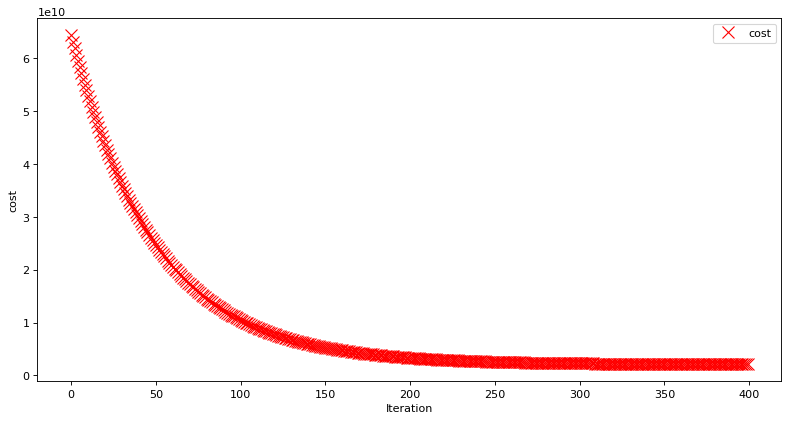

In [131]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(np.arange(0,400),lij,'xr',label="cost",markersize=10,linewidth=3)
# plt.plot(y,p,'og',label="Line",markersize=10,linewidth=3)
# plt.plot(y,p1,'+b',label="Gradient_Line",markersize=10,linewidth=3)
plt.xlabel("Iteration")
plt.ylabel('cost')
plt.legend()
# plt.axis([0, 25, -5, 25],'tight')